In [2]:
from scipy.io import loadmat, savemat
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline

In [15]:

### VTC computation 

def interp_RT(RT):
    ### Interpolate missing reaction times using the average of proximal values.
    # Note that this technique behaves poorly when two 0 are following each other 
    for i in range(len(RT)):
        if RT[i] == 0:
            try:
                RT[i] = np.mean((RT[i-1], RT[i+1]))
            except:
                RT[i] = RT[i-1]
    RT_interpolated = RT
    return RT_interpolated

def compute_VTC(RT_interp, filt=True, filt_order=3, filt_cutoff=0.05):
    ### Compute the variance time course (VTC) of the array RT_interp
    VTC = (RT_interp - np.mean(RT_interp))/np.std(RT_interp)
    if filt == True:
        b, a = signal.butter(filt_order,filt_cutoff)
        VTC_filtered = signal.filtfilt(b, a, abs(VTC))
    VTC = VTC_filtered
    return VTC

def in_out_zone(VTC):
    ### Collects the indices of IN/OUT zone trials     
    INzone = []
    OUTzone = []
    VTC_med = np.median(VTC)
    for i, val in enumerate(VTC):
        if val < VTC_med:
            INzone.append(i)
        if val >= VTC_med:
            OUTzone.append(i)
    INzone = np.asarray(INzone)
    OUTzone = np.asarray(OUTzone)
    return INzone, OUTzone

def find_bounds(array):
    ### Create a list of tuples, each containing the first and last values of every ordered sequences
    # contained in a 1D array
    
    def find_jumps(array):
        ### Finds the jumps in an array containing ordered sequences
        jumps = []
        for i,_ in enumerate(array):
            try:
                if array[i+1] != array[i]+1:
                    jumps.append(i)
            except:
                break
        return jumps
    
    jumps = find_jumps(array)
    bounds = []
    for i, jump in enumerate(jumps):
        if jump == jumps[0]:
            bounds.append(tuple([array[0], array[jump]]))
        else:
            bounds.append(tuple([array[jumps[i-1]+1], array[jump]]))
        if i == len(jumps)-1:
            bounds.append(tuple([array[jump+1], array[-1]]))
    return bounds

def get_VTC_from_file(filepath):
    data = loadmat(filepath)
    df_response = pd.DataFrame(data['response'])
    RT_array= np.asarray(df_response.loc[:,4])
    RT_interp = interp_RT(RT_array)
    VTC = compute_VTC(RT_interp)
    INzone, OUTzone = in_out_zone(VTC)
    INbounds = find_bounds(INzone)
    OUTbounds = find_bounds(OUTzone)
    return VTC, INbounds, OUTbounds, INzone, OUTzone

def plot_VTC(VTC, figpath=None, save=False):
    x = np.arange(0, len(VTC))
    OUT_mask = np.ma.masked_where(VTC >= np.median(VTC), VTC)
    IN_mask = np.ma.masked_where(VTC < np.median(VTC), VTC)
    lines = plt.plot(x, OUT_mask, x, IN_mask)
    fig = plt.plot()
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.legend(('IN zone', 'OUT zone'), loc='upper right')
    plt.title('IN vs OUT zone')
    if save == True:
        plt.savefig(figpath)
    plt.show()


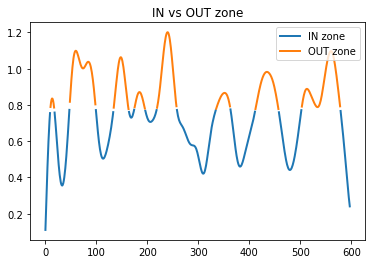

(598,)

In [17]:
LOGS_DIR = "/home/karim/pCloudDrive/science/saflow/gradCPT/gradCPT_share_Mac_PC/gradCPT_share_Mac_PC/saflow_data/"
#LOGS_DIR = 'P:\\science\\saflow\\gradCPT\\gradCPT_share_Mac_PC\\gradCPT_share_Mac_PC\\saflow_data\\'
#LOGS_DIR ='/home/hyruuk/Documents/saflow_temp/saflow_data/'
files_list = os.listdir(LOGS_DIR)
test_file = 'Data_0_04_4_11-Apr-2019_10_48_city_mnt_v1B_beh_fMRI.mat'
test_file_path = LOGS_DIR + test_file

VTC, INbounds, OUTbounds, INzone, OUTzone = get_VTC_from_file(test_file_path)
#plot_VTC(VTC, save=True, figpath=LOGS_DIR + 'test_fig.png')
plot_VTC(VTC)
VTC.shape

In [18]:
print(INzone)
print(OUTbounds)

[  0   1   2   3   4   5   6   7   8   9  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 164 165 166 167 168 169 170 171 172 173 174 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 458 459 460 461 462 463 464 465 466 467 468 46

In [20]:
OUTzone.shape

(299,)

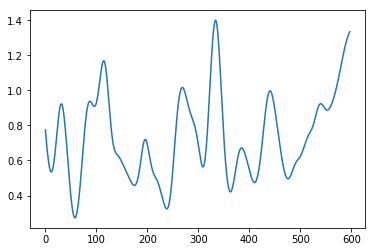

In [18]:
plt.plot(VTC)

/home/karim/electrophy/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


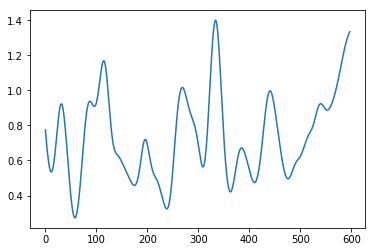

In [12]:
### Low-pass filtering of the VTC curve
### (two-pass convolution by butterworth kernel, right?)

plt.plot(VTC_filtered)
#plt.savefig('VTC_python.png')

(1, 2)

In [2]:
### Compute the median and get tuples for in-zone/out-zone periods
# OUTPUTS : 2 lists of tuples, one for In and other for Out zone, each tuple indicates a "period"



INzone, OUTzone = in_out_zone(VTC_filtered)
print(INzone)
INbounds = find_bounds(INzone)
OUTbounds = find_bounds(OUTzone)
print(INbounds)
print(OUTbounds)
    
#    if val > VTC_med:
#        if VTC_filtered[i-1] < VTC_med:
#            med_crossings.append(i)
#    if val < VTC_med:
#        if VTC_filtered[i-1] > VTC_med:
#            med_crossings.append(i)
            
#print(med_crossings)

NameError: name 'in_out_zone' is not defined

In [80]:
### For plotting VTC curve with In/Out-zone 
### Créer LineCollection object pour plot la ligne avec 
    # différentes couleurs pour In/Out zone
    # https://matplotlib.org/examples/pylab_examples/multicolored_line.html



def find_bounds(array):
    def find_jumps(array):
        jumps = []
        for i,_ in enumerate(array):
            try:
                if array[i+1] != array[i]+1:
                    jumps.append(i)
            except:
                break
        return jumps
    
    jumps = find_jumps(array)
    bounds = []
    for i, jump in enumerate(jumps):
        if jump == jumps[0]:
            bounds.append(tuple([array[0], array[jump]]))
        else:
            bounds.append(tuple([array[jumps[i-1]+1], array[jump]]))
        if i == len(jumps)-1:
            bounds.append(tuple([array[jump+1], array[-1]]))
    return bounds


OUTbounds

[(0, 2),
 (31, 68),
 (97, 113),
 (149, 167),
 (208, 229),
 (257, 290),
 (295, 410),
 (461, 478),
 (542, 573)]

In [1]:
print(INbounds)

NameError: name 'INbounds' is not defined

In [14]:
VTC_matlab = np.asarray(loadmat('P:\science\saflow\gradCPT\scripts\\testVTC.mat')['Output']).squeeze()
plt.plot(VTC_matlab)
#plt.savefig('VTC_matlab.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'P:\\science\\saflow\\gradCPT\\scripts\\testVTC.mat'